In [1]:
## Loan Default Prediction Using XGBoost (Scikit-learn + PySaprk)

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import joblib


In [2]:
!pip install xgboost onnxmltools onnx scikit-learn skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.5/352.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 13.2 MB/s eta 0:00:00


In [3]:
# For ONNX Conversion
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnx

In [5]:
#Load and Preprocess Data
df = pd.read_csv('/content/Loan_default_Selected_8_features.csv')
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio,LoanTerm,Default
0,56,85994,50587,520,80,15.23,0.44,36.0,0.0
1,69,50432,124440,458,15,4.81,0.68,60.0,0.0
2,46,84208,129188,451,26,21.17,0.31,24.0,1.0
3,32,31713,44799,743,0,7.07,0.23,24.0,0.0
4,60,20437,9139,633,8,6.51,0.73,48.0,0.0


In [6]:
df = df.dropna()

EDA (Exploratory Data Analysis)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
print("Basic Information:")
print(df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 136188 entries, 0 to 136187
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             136188 non-null  int64  
 1   Income          136188 non-null  int64  
 2   LoanAmount      136188 non-null  int64  
 3   CreditScore     136188 non-null  int64  
 4   MonthsEmployed  136188 non-null  int64  
 5   InterestRate    136188 non-null  float64
 6   DTIRatio        136188 non-null  float64
 7   LoanTerm        136188 non-null  float64
 8   Default         136188 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 10.4 MB
None


In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                 Age         Income     LoanAmount    CreditScore  \
count  136188.000000  136188.000000  136188.000000  136188.000000   
mean       43.520237   82528.023585  127607.686228     574.368931   
std        14.976789   38967.779858   70909.527312     158.730032   
min        18.000000   15000.000000    5005.000000     300.000000   
25%        31.000000   48796.000000   66160.000000     437.000000   
50%        44.000000   82559.000000  127382.500000     574.000000   
75%        56.000000  116250.500000  189123.000000     711.000000   
max        69.000000  149997.000000  249999.000000     849.000000   

       MonthsEmployed   InterestRate       DTIRatio       LoanTerm  \
count   136188.000000  136188.000000  136188.000000  136188.000000   
mean        59.499934      13.496652       0.500462      36.029518   
std         34.640515       6.639887       0.230746      16.951679   
min          0.000000       2.000000       0.100000      12.000000   
25%    

In [10]:
print("\nClass Distribution:")
print(df['Default'].value_counts())



Class Distribution:
Default
0.0    120459
1.0     15729
Name: count, dtype: int64


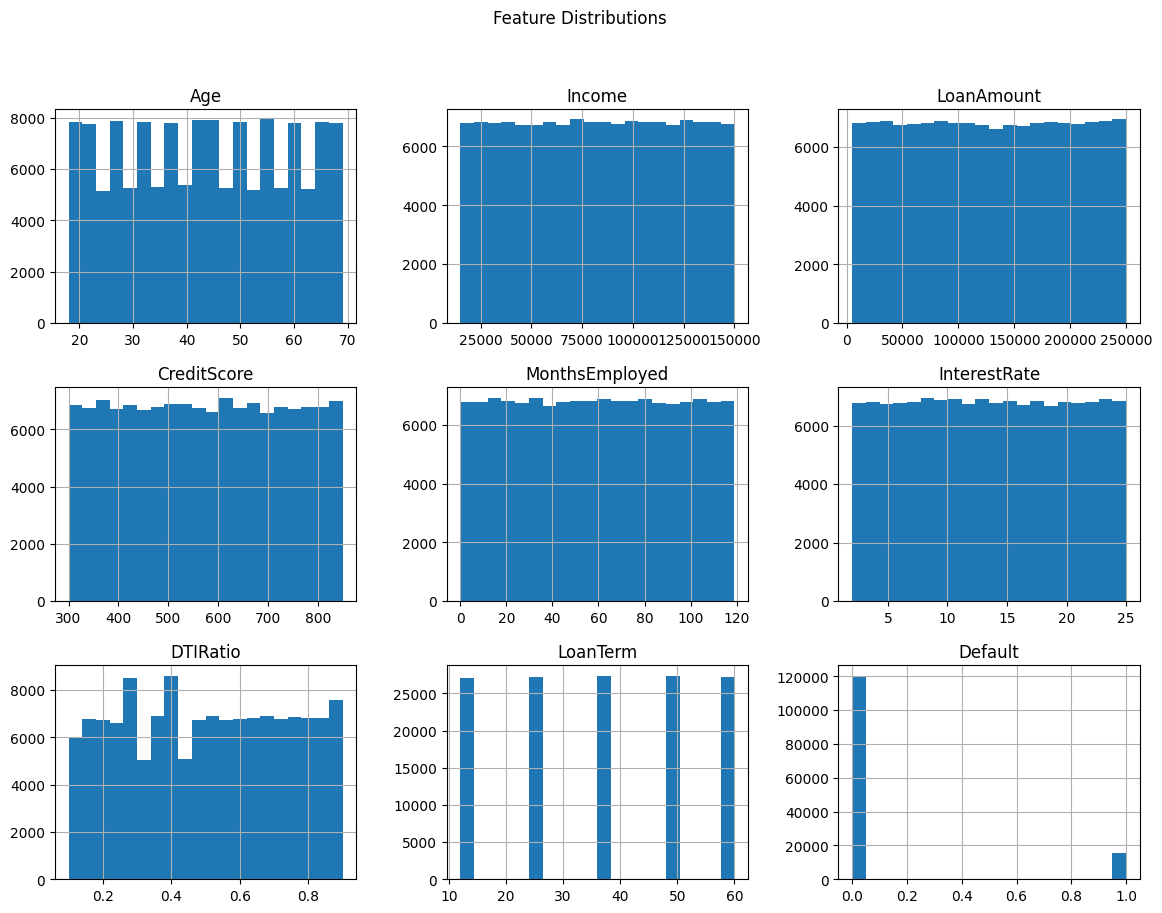

In [11]:
# Distribution of numerical features
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

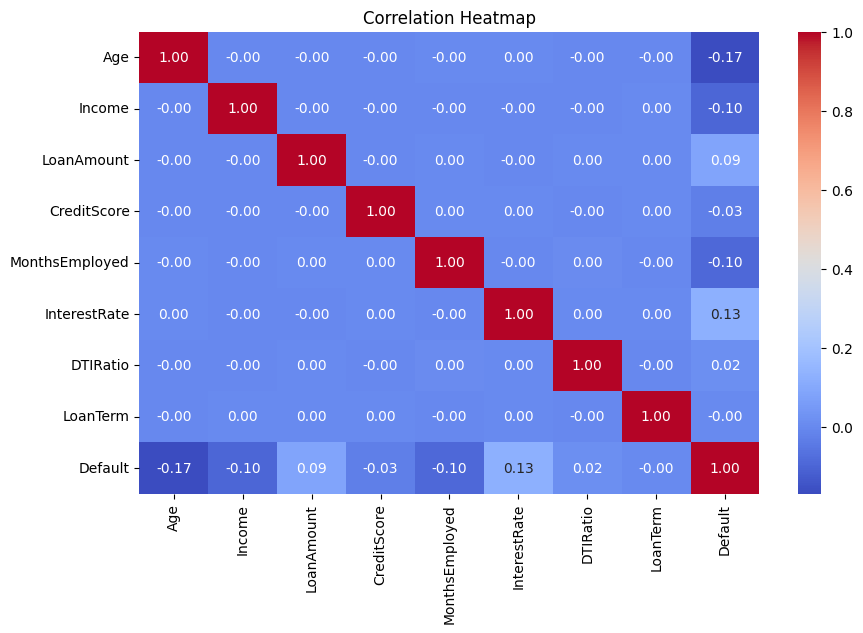

In [12]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

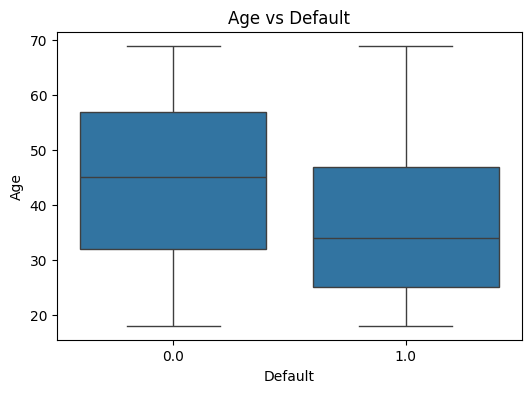

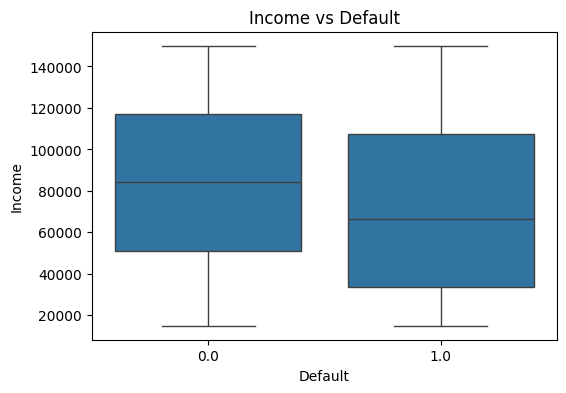

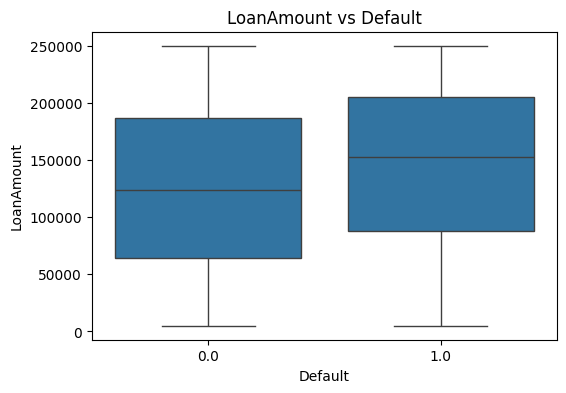

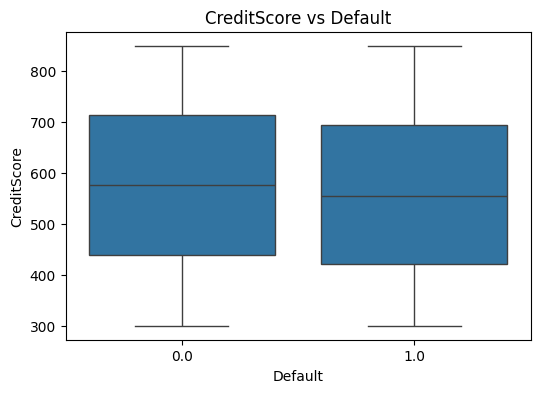

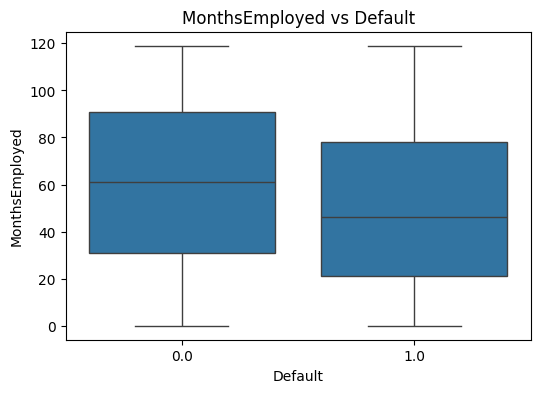

In [13]:
# Default vs Categorical/Continuous features (boxplots)
for col in ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Default", y=col, data=df)
    plt.title(f"{col} vs Default")
    plt.show()

In [14]:
#Feature and Target Selection
feature_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore',
                'MonthsEmployed', 'InterestRate', 'DTIRatio', 'LoanTerm']
target_col = 'Default'

In [15]:
x = df[feature_cols]
y = df[target_col]

In [16]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=8)

In [17]:
# Train XGBClassifier (Scikit-learn)
xgb_model = XGBClassifier(
    #n_estimators=200,
    #learning_rate=0.1,
    #max_depth=3,
    random_state=8,
    #use_label_encoder=False,
    #eval_metric="logloss"
    )

xgb_model.fit(x_train.values, y_train.values)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:
# predictions and Evaluation
y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (Scikit-learn XGB): {accuracy:.2f}")
print("Classifiction Report:")
print(classification_report(y_test, y_pred))

Model Accuracy (Scikit-learn XGB): 0.88
Classifiction Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     36057
         1.0       0.47      0.07      0.13      4800

    accuracy                           0.88     40857
   macro avg       0.68      0.53      0.53     40857
weighted avg       0.84      0.88      0.84     40857



In [19]:
#Save Model
joblib.dump(xgb_model, "Loan_default_prediction_model.pkl")

['Loan_default_prediction_model.pkl']

In [20]:
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType

#Export Scikit-learn XGB to ONNX
initial_type = [('float_input', FloatTensorType([None, x_train.shape[1]]))]
#onnx_model = convert_sklearn(xgb_model, initial_types=initial_type)
onnx_model = onnxmltools.convert_xgboost(xgb_model, initial_types=initial_type)
onnx.save_model(onnx_model, "Loan_default_prediction_model.onnx")

print("XGB model exported to ONNX successfully.")

XGB model exported to ONNX successfully.


##PySpark XGBClassification (SparkXGB)

In [21]:
!pip install sparkxgb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.4-py2.py3-none-any.whl size=317849769 sha256=57d2b91871be416cdfbef696fa91109372c44fba4c95a4f359081aa8a835ed97
  Stored in directory: /root/.cache/pip/wheels/8d/28/22/5dbae8a8714ef046cebd320d0ef7c92f5383903cf854c15c0c
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.5.1
    Uninstalling pyspark-3.5.1:
      Successfully uninstalled pyspark-3.5.1


In [22]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from xgboost.spark import SparkXGBClassifier

In [23]:
#Start Spark Session
spark = SparkSession.builder.appName("Loan_Default_Prediction_XGB").getOrCreate()

In [24]:
#Load Data into spark
spark_df = spark.createDataFrame(df)

In [25]:
#Feature Engineering
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_df = assembler.transform(spark_df).select("features", target_col)

In [26]:
#Train-Test Split
train, test = spark_df.randomSplit([0.7, 0.3], seed=42)

In [27]:
#Train XGBClassifier (PySpark)
spark_xgb = SparkXGBClassifier(
    features_col="features",
    label_col=target_col,
    num_workers=2,
    max_depth=5,
    eta=0.1,
    num_round=200
)

spark_xgb_model = spark_xgb.fit(train)

INFO:XGBoost-PySpark:Running xgboost-3.0.4 on 2 workers with
	booster params: {'objective': 'binary:logistic', 'device': 'cpu', 'max_depth': 5, 'eta': 0.1, 'num_round': 200, 'nthread': 1}
	train_call_kwargs_params: {'verbose_eval': True, 'num_boost_round': 100}
	dmatrix_kwargs: {'nthread': 1, 'missing': nan}
INFO:XGBoost-PySpark:Finished xgboost training!


In [28]:
#Prediction and Evaluation
predictions = spark_xgb_model.transform(test)
predictions.select(target_col, "prediction", "probability").show(5, truncate=False)

+-------+----------+----------------------------------------+
|Default|prediction|probability                             |
+-------+----------+----------------------------------------+
|1.0    |0.0       |[0.585904598236084,0.414095401763916]   |
|1.0    |0.0       |[0.6270134449005127,0.3729865550994873] |
|0.0    |1.0       |[0.1999700665473938,0.8000299334526062] |
|0.0    |0.0       |[0.7523966431617737,0.24760334193706512]|
|0.0    |0.0       |[0.5330207943916321,0.4669792056083679] |
+-------+----------+----------------------------------------+
only showing top 5 rows



In [29]:
#Save Spark Model
spark_xgb_model.save("spark_xgb_model")

In [30]:
#Export PySpark XGB to ONNX
booster = spark_xgb_model.get_booster()
booster.save_model("spark_xgb_model.json")

In [31]:
#Convert to ONNX using onnxmltools
import onnxmltools
from onnxmltools.convert.common.data_types import FloatTensorType
import onnx

In [35]:
initial_type = [('float_input', FloatTensorType([None, len(feature_cols)]))]
onnx_model_spark = onnxmltools.convert_xgboost(booster, initial_types=initial_type)

onnx.save_model(onnx_model_spark, "loan_default_spark_xgb_model.onnx")
print("PySpark XGB model exported to ONNX successfully.")

PySpark XGB model exported to ONNX successfully.


In [33]:
#Stop Spark Session
spark.stop()